<h1>Cuadernillo de apoyo (caos) de la charla: caos, estabilidad y catástrofe de la XI Jornada de las Matemáticas Universidad Distrital presentado por Arturo Sanjuán.</h1>

Primero llamemos algunas librerías

In [1]:
from sympy import *
from sympy.plotting import plot_parametric, plot3d
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets.widgets import *
from pynamicalmod import *
%matplotlib inline
#from pynamical import cobweb_plot, simulate, save_fig, phase_diagram
import pandas as pd, numpy as np, matplotlib.pyplot as plt, IPython.display as IPdisplay, glob
from PIL import Image
from numba import jit
init_printing()

Una simulación pequeña de la ecuación logística

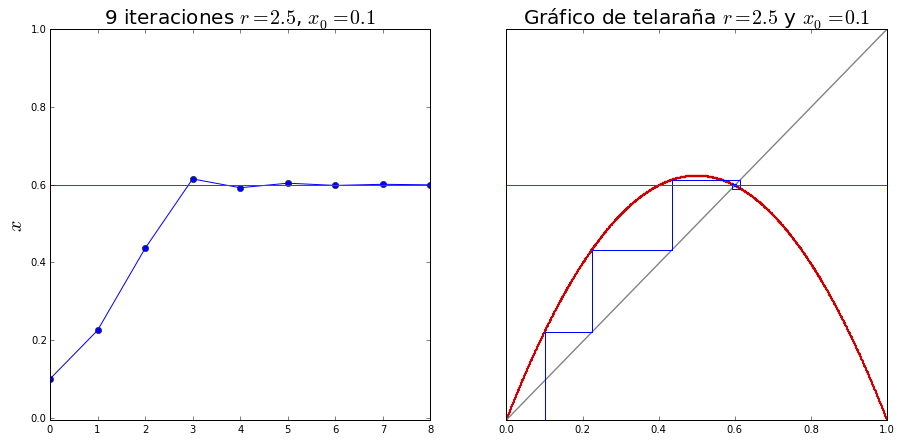

In [2]:
# plot the chaotic and random time series to show how they are sometimes tough to differentiate
fig = plt.figure(figsize=(15,7))
ax1 = fig.add_subplot(121)
ax1.set_ylim([-0.005, 1])
plt.plot(simulate(num_rates = 1, rate_min = 2.5, rate_max = 2, initial_pop = 0.1, num_gens = 9), 'bo')
plt.plot(simulate(num_rates = 1, rate_min = 2.5, rate_max = 2, initial_pop = 0.1, num_gens = 9))

ax1.set_title(r"9 iteraciones $r=2.5$, $x_0=0.1$", fontsize = 20)
ax1.set_ylabel(r"$x$", fontsize = 20)
plt.plot([0,8],[3/5,3/5], color = 'green')


ax2 = fig.add_subplot(122)
plt.yticks([])
cobweb_plot(figura = fig, eje = ax2, cobweb_x = 0.1, r=2.5, cobweb_n=10)
plt.plot([0,8],[3/5,3/5], color = 'green')
ax2.set_title('Gráfico de telaraña $r=2.5$ y $x_0=0.1$', fontsize = 20)

fig.savefig("caos1.pdf")

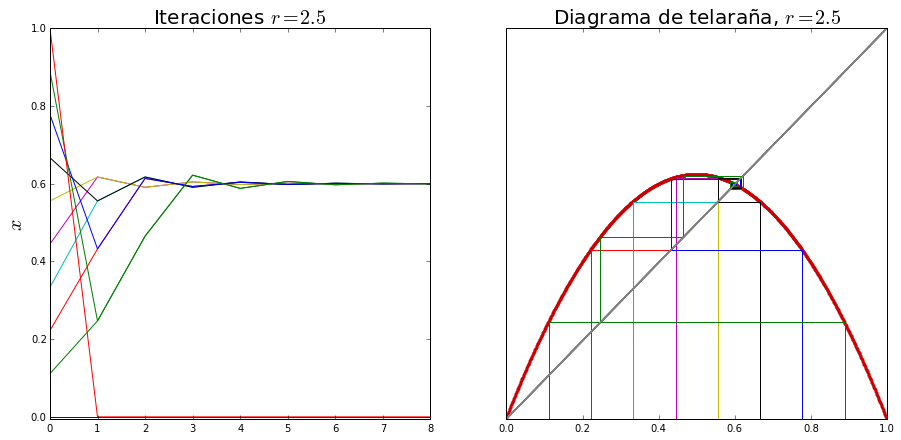

In [3]:
# plot the chaotic and random time series to show how they are sometimes tough to differentiate
fig = plt.figure(figsize=(15,7))
ax1 = fig.add_subplot(121)
ax1.set_ylim([-0.005, 1])
for i in np.linspace(0, 1, 10):
    plt.plot(simulate(num_rates = 1, rate_min = 2.5, rate_max = 2, initial_pop = i, num_gens = 9))
ax1.set_title(r"Iteraciones $r=2.5$", fontsize = 20)
ax1.set_ylabel(r"$x$", fontsize = 20)

ax2 = fig.add_subplot(122)
plt.yticks([])
for i in np.linspace(0,1,10):
    cobweb_plot(figura = fig, eje = ax2, cobweb_x = i, r=2.5, cobweb_n=10)

fig.savefig("caos2.pdf")

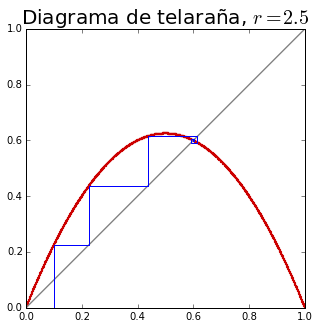

In [4]:
fig = plt.figure(figsize=(5,5))
ax = fig.gca()
cobweb_plot(figura = fig, eje = ax, cobweb_x = 0.1, r=2.5, cobweb_n=10)

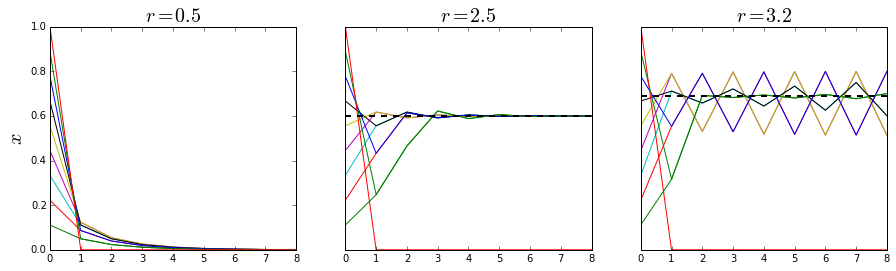

In [5]:
# plot the chaotic and random time series to show how they are sometimes tough to differentiate
fig = plt.figure(figsize=(15,4))

ax1 = fig.add_subplot(131)
for i in np.linspace(0, 1, 10):
    plt.plot(simulate(num_rates = 1, rate_min = 0.5, rate_max = 2, initial_pop = i, num_gens = 9))
ax1.set_title(r"$r=0.5$", fontsize = 20)
ax1.set_ylabel(r"$x$", fontsize = 20)

ax2 = fig.add_subplot(132)
plt.yticks([])
for i in np.linspace(0, 1, 10):
    plt.plot(simulate(num_rates = 1, rate_min = 2.5, rate_max = 2, initial_pop = i, num_gens = 9))
ax2.set_title(r"$r=2.5$", fontsize = 20)
plt.plot([0,8],[3/5,3/5], color = 'black', linestyle = '--', linewidth = 2)


ax3 = fig.add_subplot(133)
plt.yticks([])
for i in np.linspace(0, 1, 10):
    plt.plot(simulate(num_rates = 1, rate_min = 3.2, rate_max = 2, initial_pop = i, num_gens = 9))
ax3.set_title(r"$r=3.2$", fontsize = 20)
plt.plot([0,8],[2.2/3.2,2.2/3.2], color = 'black', linestyle = '--', linewidth = 2)


fig.savefig("caos3.pdf")

In [6]:
# plot the chaotic and random time series to show how they are sometimes tough to differentiate
def plot_fixed(r):
    fig = plt.figure(figsize=(7,7))
    for i in np.linspace(0, 1, 10):
        plt.plot(simulate(num_rates = 1, rate_min = r, rate_max = 2, initial_pop = i, num_gens = 9))
    if r>1:
        plt.plot([0,8],np.repeat((r-1)/r,2), color = 'black', linestyle = '--', linewidth = 2)
    ax1.set_title(r"$r=0.5$", fontsize = 20)
    ax1.set_ylabel(r"$x$", fontsize = 20)

In [7]:
interact(plot_fixed, r = FloatSlider(min=0,max=4,step=0.2,value=0, description = r'$r$'))

interactive(children=(FloatSlider(value=0.0, description='$r$', max=4.0, step=0.2), Output()), _dom_classes=('widget-interact',))

<function __main__.plot_fixed>

Algunas cuentas algebraicas que se pudieron haber hecho a mano

In [8]:
x, r = symbols('x, r')

In [9]:
f = r*x*(1-x)
f2 = f.subs(x, f)
factor([f,f2])

In [10]:
solve(discriminant(diff(simplify(f2-x)/x,x),x))

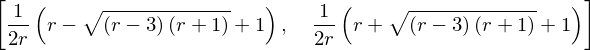

In [11]:
raices  = solve(simplify(((f2-x)/(x*r))/(x-(r-1)/r)),x)
raices

In [12]:
[simplify(diff(f2,x).subs(x, raices[0])), simplify(diff(f2,x).subs(x, raices[1]))]

In [13]:
solve(-pow(r,2) - 2*r + 3)

Más simulaciones

In [14]:
@jit(nopython=True)
def logmap(x, r):
    return r*x*(1-x)
def logmap2(x, r):
    return logmap(logmap(x, r), r)

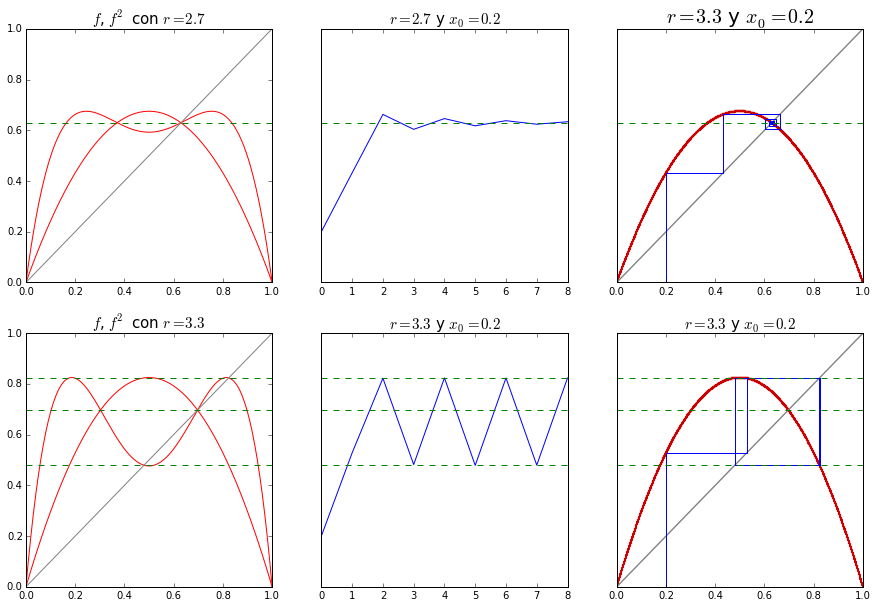

In [15]:
# plot the chaotic and random time series to show how they are sometimes tough to differentiate
fig = plt.figure(figsize=(15,10))
x = np.linspace(0, 1, 200)

ax1 = fig.add_subplot(231)
plt.plot(x, logmap(x, 2.7), color = 'red')
plt.plot(x, logmap2(x, 2.7), color = 'red')
plt.plot(x, x, color ='gray')
plt.plot([0,8],np.repeat(1.7/2.7,2), color = 'green', linestyle = '--')
ax1.set_title(r"$f$, $f^2$ con $r=2.7$", fontsize = 15)
ax1.set_xlim([0, 1])
ax1.set_ylim([0, 1])


ax2 = fig.add_subplot(232)
plt.plot(simulate(num_rates = 1, rate_min = 2.7, rate_max = 2.7, initial_pop = 0.2, num_gens = 9))
plt.plot([0,8],np.repeat(1.7/2.7,2), color = 'green', linestyle = '--')
ax2.set_title(r"$r=2.7$ y $x_0=0.2$", fontsize = 15)
ax2.set_ylim([0,1])
plt.yticks([])


ax3 = fig.add_subplot(233)
plt.yticks([])
cobweb_plot(figura = fig, eje = ax3, cobweb_x = 0.2, r=2.7, cobweb_n=10)
plt.plot([0,8],np.repeat(1.7/2.7,2), color = 'green', linestyle = '--')
ax3.set_title('$r=3.3$ y $x_0=0.2$', fontsize = 20)

ax4 = fig.add_subplot(234)
plt.plot(x, logmap(x, 3.3), color = 'red')
plt.plot(x, logmap2(x, 3.3), color = 'red')
plt.plot(x, x, color ='gray')
plt.plot([0,8],np.repeat(2.3/3.3,2), color = 'green', linestyle = '--')
plt.plot([0,8],np.repeat(0.479,2), color = 'green', linestyle = '--')
plt.plot([0,8],np.repeat(0.824,2), color = 'green', linestyle = '--')
ax4.set_title(r"$f$, $f^2$ con $r=3.3$", fontsize = 15)
ax4.set_xlim([0, 1])
ax4.set_ylim([0, 1])


ax5 = fig.add_subplot(235)
plt.plot(simulate(num_rates = 1, rate_min = 3.3, rate_max = 3.3, initial_pop = 0.2, num_gens = 9))
plt.plot([0,8],np.repeat(2.3/3.3,2), color = 'green', linestyle = '--')
plt.plot([0,8],np.repeat(0.479,2), color = 'green', linestyle = '--')
plt.plot([0,8],np.repeat(0.824,2), color = 'green', linestyle = '--')
ax5.set_title(r"$r=3.3$ y $x_0=0.2$", fontsize = 15)
ax5.set_ylim([0,1])
plt.yticks([])


ax6 = fig.add_subplot(236)
plt.yticks([])
cobweb_plot(figura = fig, eje = ax6, cobweb_x = 0.2, r=3.3, cobweb_n=15)
plt.plot([0,8],np.repeat(2.3/3.3,2), color = 'green', linestyle = '--')
plt.plot([0,8],np.repeat(0.479,2), color = 'green', linestyle = '--')
plt.plot([0,8],np.repeat(0.824,2), color = 'green', linestyle = '--')
ax6.set_title('$r=3.3$ y $x_0=0.2$', fontsize = 15)

fig.savefig("caos4.pdf")

In [16]:
@jit(nopython=True)
def logmap(x, r):
    return r*x*(1-x)
def logmapi(x, r, i):
    logmap_value = logmap(x, r)
    for j in range(1, i):
        logmap_value = logmap(logmap_value, r)
    return logmap_value

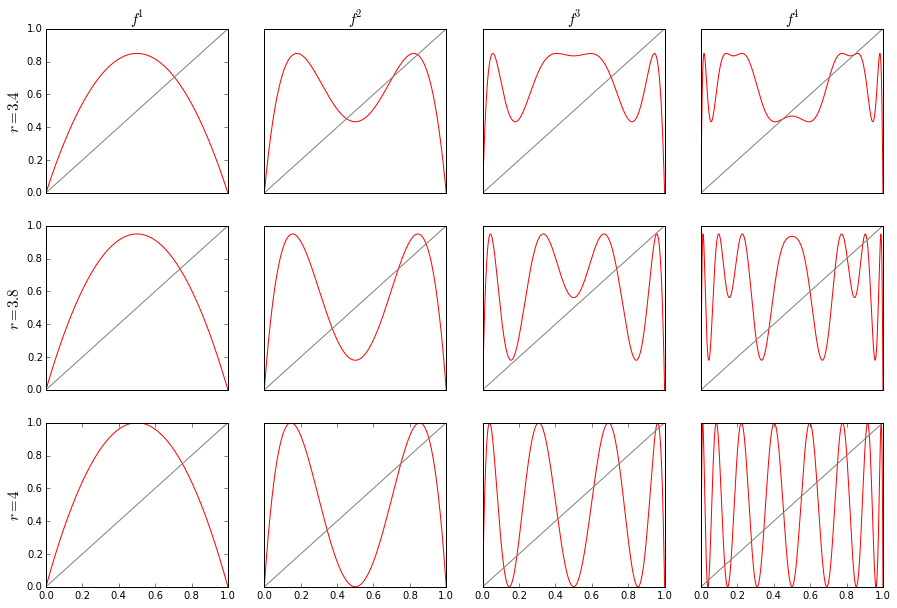

In [17]:
# plot the chaotic and random time series to show how they are sometimes tough to differentiate
fig = plt.figure(figsize=(15,10))
x = np.linspace(0, 1, 1000)

ax = [[None, None, None, None], [None, None, None, None], [None, None, None, None]]
erres = [3.4, 3.8, 4]
potencias = [1, 2, 3, 4]
paso = 0

for i in range(0,3):
    for j in range(0,4):
        paso = paso + 1
        ax[i][j] = fig.add_subplot(3,4, paso)
        plt.plot(x, logmapi(x, erres[i], potencias[j]), color = 'red')
        plt.plot(x, x, color ='gray')
        if i == 0:
            ax[i][j].set_title(r'$f^{}$'.format(j+1), fontsize = 15)
        if j != 0:
            ax[i][j].set_yticks([])
        else:
            ax[i][j].set_ylabel(r'$r={}$'.format(erres[i]), fontsize = 15)
        if i !=2:
            ax[i][j].set_xticks([])
        ax[i][j].set_xlim([0, 1])
        ax[i][j].set_ylim([0, 1])

fig.savefig("caos5.pdf")

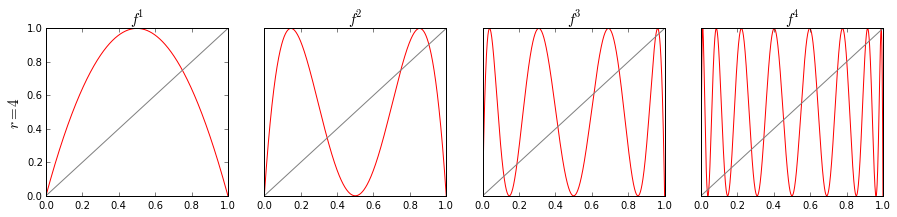

In [18]:
# plot the chaotic and random time series to show how they are sometimes tough to differentiate
fig = plt.figure(figsize=(15,3))
x = np.linspace(0, 1, 1000)

ax = [None, None, None, None]
for j in range(0,4):
    ax[j] = fig.add_subplot(1, 4, j + 1)
    plt.plot(x, logmapi(x, 4, j + 1), color = 'red')
    plt.plot(x, x, color ='gray')
    ax[j].set_title(r'$f^{}$'.format(j+1), fontsize = 15)
    if j != 0:
        ax[j].set_yticks([])
    else:
        ax[j].set_ylabel(r'$r=4$', fontsize = 15)
    ax[j].set_xlim([0, 1])
    ax[j].set_ylim([0, 1])

fig.savefig("caos6.pdf")

El diagrama de bifurcación

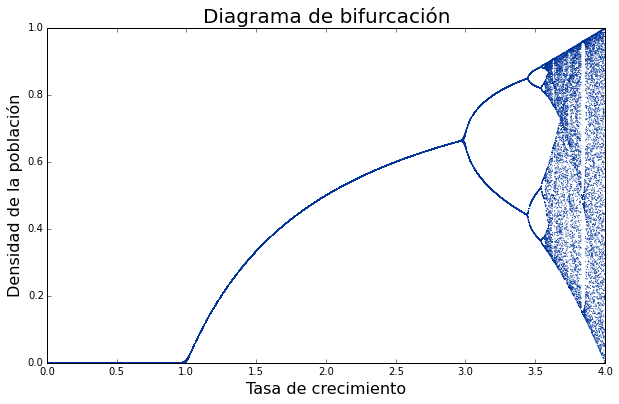

In [19]:
pops = simulate(model=logistic_map, num_gens=100, rate_min=0, rate_max=4, num_rates=1000, num_discard=100)
bifurcation_plot(pops, title = 'Diagrama de bifurcación', xlabel='Tasa de crecimiento', ylabel = 'Densidad de la población', folder = './', filename = 'caos7')

Interacciones cercanas al caos

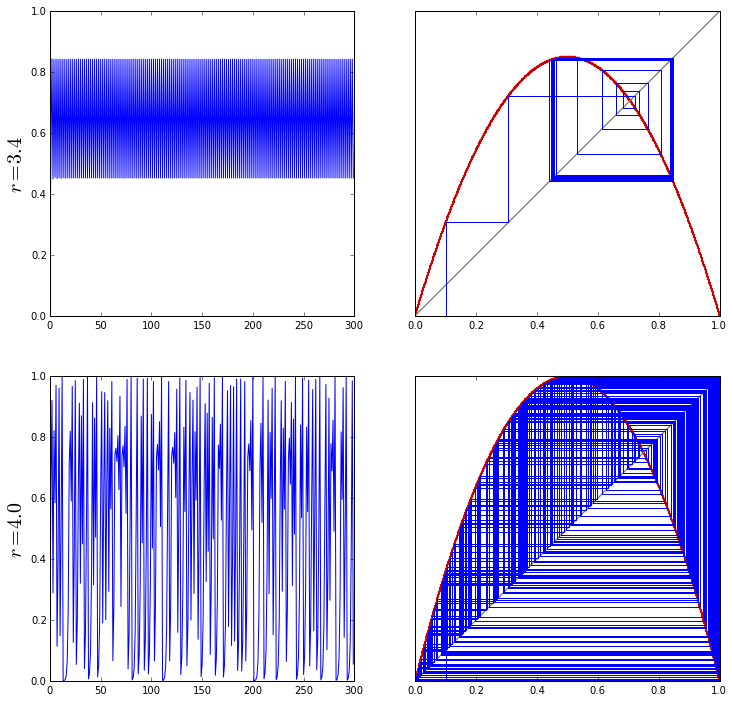

In [20]:
# plot the chaotic and random time series to show how they are sometimes tough to differentiate
fig = plt.figure(figsize=(12,12))

erres =[3.4,  4.0]
ax = [[None, None],  [None, None]]
paso = 0
for i in range(0,2):
    paso = paso + 1
    ax[i][0] = fig.add_subplot(2, 2, paso)
    ax[i][0].set_ylim([0, 1])
    plt.plot(simulate(num_rates = 1, rate_min = erres[i], rate_max = erres[i], initial_pop = 0.2, num_gens = 300))
    ax[i][0].set_ylabel(r"$r={}$".format(erres[i]), fontsize = 20)
    
    paso = paso + 1
    ax[i][1] = fig.add_subplot(2, 2, paso)
    plt.yticks([])
    cobweb_plot(figura = fig, eje = ax[i][1], cobweb_x = 0.1, r=erres[i], cobweb_n=300)
    ax[i][1].set_title('')

fig.savefig("caos8.pdf")

In [21]:
def plotchaos(r, x, n):
    fig = plt.figure(figsize=(10,4))
    ax1 = fig.add_subplot(121)
    ax1.set_ylim([0, 1])
    ax1.set_xlim([0, n-1])
    plt.plot(simulate(num_rates = 1, rate_min = r, rate_max = r, initial_pop = x, num_gens = n))
    ax1.set_ylabel(r"$r={}$".format(r), fontsize = 20)
    
    ax2 = fig.add_subplot(122)
    plt.yticks([])
    cobweb_plot(figura = fig, eje = ax2, cobweb_x = x, r=r, cobweb_n=n)
    ax2.set_title('')

In [22]:
interact(plotchaos, r = FloatSlider(min=0,max=4,step=0.1, value=0.4, description = r'$r$'),\
         x = FloatSlider(min=0,max=1,step=0.05, value=0.2, description = r'$x_0$'), \
        n = IntSlider(min=1,max=300, value=20, description = r'$n$'))

interactive(children=(FloatSlider(value=0.4, description='$r$', max=4.0), FloatSlider(value=0.2, description='$x_0$', max=1.0, step=0.05), IntSlider(value=20, description='$n$', max=300, min=1), Output()), _dom_classes=('widget-interact',))

<function __main__.plotchaos>